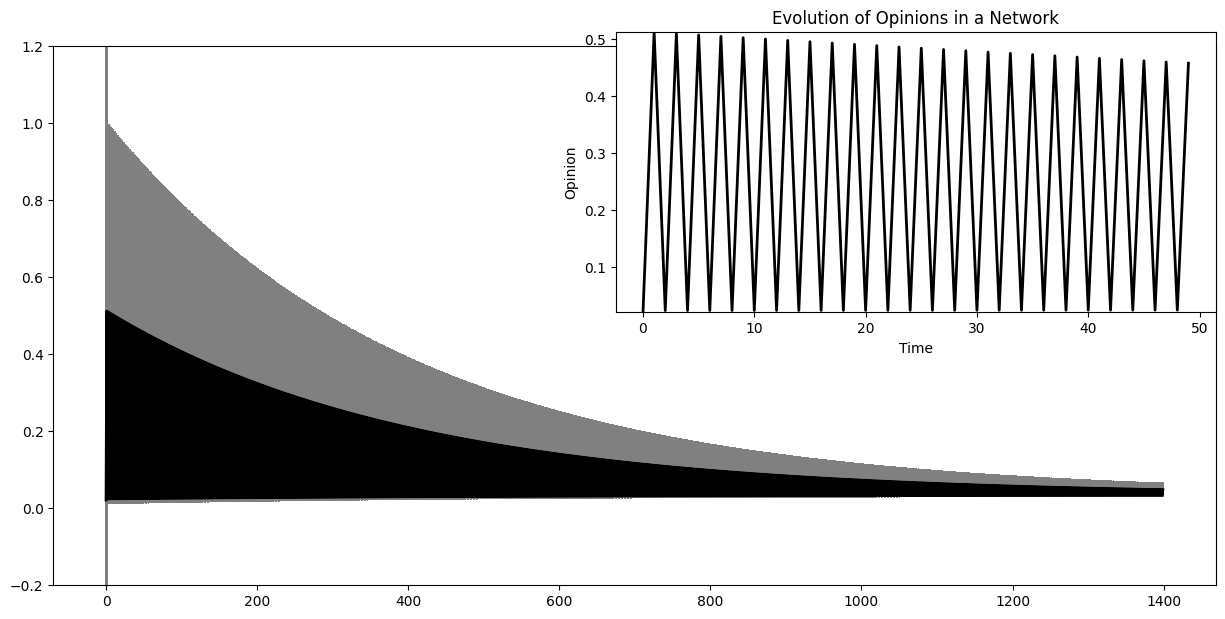

In [3]:
#%%
import numpy as np
import matplotlib.pyplot as plt
n = 200
T = 1400
mu = 0
sigma = 1

# Initialize 2n x 2n matrix
W = np.zeros((2*n, 2*n))

# Star graph
for j in range(1, n):
    W[0, j] = W[j, 0] = 1

# Complete graph
for i in range(n, 2*n):
    for j in range(n, 2*n):
        if i != j:
            W[i, j] = 1

# Connecting star graph and complete graph
W[n, 0] = W[0, n] = 1

# Equal neighbor matrix
P = np.diag(1 / W.sum(axis=1)) @ W

# Initialize opinions normally with opinions[0]=1
opinions = np.random.normal(mu, sigma, 2*n)
opinions[0]=1

# Simulate the opinion dynamics
opinion_history = np.zeros((2*n, T))
opinion_history[:, 0] = opinions

for t in range(1, T):
    opinions = P @ opinions
    opinion_history[:, t] = opinions

average_opinions = opinion_history.mean(axis=0)
#print(average_opinions[T-1])

# Plotting
plt.figure(figsize=(15, 7))
time_range = np.arange(T)

for i in range(2*n):
    plt.plot(time_range, opinion_history[i], color='gray', alpha=0.1)

plt.plot(time_range, average_opinions, color='black', linewidth=2)
plt.ylim(-0.2,1.2)

ax_inset = plt.axes([0.5, 0.5, 0.4, 0.4])
ax_inset.plot(time_range[:50], average_opinions[:50], color='black', linewidth=2)
ax_inset.set_title('First 50 Time Steps')
ax_inset.set_ylim(average_opinions.min(), average_opinions.max())

plt.title('Evolution of Opinions in a Network')
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.ylim(average_opinions.min(), average_opinions.max())

plt.show()

# %%
